In [1070]:
import pandas as pd

input_file = "../Data/mobils.csv"
output_file = '../Data/mobilsNET.csv'

db = pd.read_csv(input_file)
num_rows, num_columns = db.shape
print(f"Nombre de files: {num_rows}")
print(f"Nombre de columnes: {num_columns}")
print("Nombre de valors nuls per columna:")
print(db.isnull().sum())

Nombre de files: 1874
Nombre de columnes: 24
Nombre de valors nuls per columna:
URL                           3
Asin                         41
Precio                       82
Precio Inicial               82
Título                        1
Estrellas                   105
Opiniones                   106
Marca                        59
Modelo                      126
Año del modelo             1123
Dimensiones                 348
RAM                         346
Memoria                     206
Sistema operativo           916
Resolución pantalla         682
Tamaño pantalla            1678
Relación aspecto           1441
Peso                        143
Tecnología conectividad     538
Batería                    1855
Cámara principal           1800
Cámara frontal             1800
Procesador                 1349
Color                      1116
dtype: int64


In [1071]:
import numpy as np

filas_afectadas = (db['Opiniones'] < 5).sum()
db.loc[db['Opiniones'] < 5, 'Estrellas'] = np.nan

print(f"Se han eliminado {filas_afectadas} estrellas.")

Se han eliminado 120 estrellas.


In [1072]:
columnas_mean = ["Estrellas", "Peso"]

for columna in columnas_mean:
    cantidad_na = db[columna].isna().sum()
    mean = db[columna].mean()
    mean = round(mean, 1)
    db[columna] = db[columna].fillna(mean)

    print(f"La mean de {columna} es {mean} y afecta a {cantidad_na} filas.")

La mean de Estrellas es 4.1 y afecta a 225 filas.
La mean de Peso es 277.3 y afecta a 143 filas.


In [1073]:
filas_antes = len(db)
db = db[db['Peso'] >= 100]
db = db[db['Peso'] < 1000]
filas_despues = len(db)

print(f"Se eliminaron {filas_antes - filas_despues} filas al aplicar los filtros.")

Se eliminaron 86 filas al aplicar los filtros.


In [1074]:
db["RAM"] = pd.to_numeric(db["RAM"], errors='coerce')
num_filas_modificadas = (db["RAM"] > 64).sum()
db.loc[db["RAM"] > 64, "RAM"] = "null"

print(f"Se han puesto a 'null' {num_filas_modificadas} filas con RAM mayor a 64.")

db["Memoria"] = pd.to_numeric(db["Memoria"], errors='coerce')
num_filas_modificadas = (db["Memoria"] > 1024).sum()
db.loc[db["Memoria"] > 1024, "Memoria"] = "null"

print(f"Se han puesto a 'null' {num_filas_modificadas} filas con Memoria mayor a 1024.")

Se han puesto a 'null' 336 filas con RAM mayor a 64.
Se han puesto a 'null' 4 filas con Memoria mayor a 1024.


C:\Users\Marc\AppData\Local\Temp\ipykernel_1776\3531520028.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  db.loc[db["RAM"] > 64, "RAM"] = "null"
C:\Users\Marc\AppData\Local\Temp\ipykernel_1776\3531520028.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  db.loc[db["Memoria"] > 1024, "Memoria"] = "null"


In [1075]:
db[["RAM", "Memoria"]] = db[["RAM", "Memoria"]].replace("null", np.nan)

C:\Users\Marc\AppData\Local\Temp\ipykernel_1776\3673333876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db[["RAM", "Memoria"]] = db[["RAM", "Memoria"]].replace("null", np.nan)


In [1076]:
import pandas as pd

columnas_moda = ["RAM", "Memoria", "Dimensiones"]
filas_antes = len(db)
db = db.dropna(subset=columnas_moda, how="all")
filas_despues = len(db)
modas_aplicadas = {}
for columna in columnas_moda:
    if not db[columna].isna().all():
        if columna == "RAM":
            moda = 8
        elif columna == "Memoria":
            moda = 128
        else:
            moda = db[columna].mode()[0]
        cantidad_nulos = db[columna].isna().sum()
        db[columna] = db[columna].fillna(moda)
        modas_aplicadas[columna] = cantidad_nulos
        print(f"La moda de {columna} es {moda}, aplicada en {cantidad_nulos} filas.")

print(f"Se han eliminado {filas_antes - filas_despues} filas.")

La moda de RAM es 8, aplicada en 599 filas.
La moda de Memoria es 128, aplicada en 138 filas.
La moda de Dimensiones es 50 x 50 x 28, aplicada en 312 filas.
Se han eliminado 30 filas.


In [1077]:
filas_antes = len(db)
db = db.dropna(subset=["Precio", "Precio Inicial"])
filas_despues = len(db)

print(f"Se han eliminado {filas_antes - filas_despues} filas en total.")


Se han eliminado 69 filas en total.


In [1078]:
import numpy as np

marcas_unicas = db['Marca'].map(db['Marca'].value_counts()) == 1
filas_reemplazadas = marcas_unicas.sum()
db['Marca'] = db['Marca'].where(
    db['Marca'].map(db['Marca'].value_counts()) > 1
)
db['Marca'] = db['Marca'].replace('no', np.nan)

print(f"Se han reemplazado {filas_reemplazadas} filas con NaN.")

Se han reemplazado 71 filas con NaN.


In [1079]:
marcas_unicas = db['Marca'].dropna().unique()

db['Título'] = db['Título'].str.lower()

def buscar_marca(row):
    if pd.isna(row['Marca']):
        for marca in marcas_unicas:
            if isinstance(row['Título'], str) and marca in row['Título']:
                return marca
    return row['Marca']

filas_con_nan = db['Marca'].isna().sum()
db['Marca'] = db.apply(buscar_marca, axis=1)
filas_con_marca_asignada = filas_con_nan - db['Marca'].isna().sum()
db = db.dropna(subset=["Marca"])

print(f"Se asignaron marcas según el título en {filas_con_marca_asignada} filas.")
print(f"Se eliminaron {filas_con_nan - filas_con_marca_asignada} filas porque no se pudo encontrar una marca.")

Se asignaron marcas según el título en 427 filas.
Se eliminaron 50 filas porque no se pudo encontrar una marca.


In [1080]:
db['Modelo'].nunique()

1270

In [1081]:
db = db.drop(columns=['Modelo'])

In [1082]:
db = db.drop(columns=["URL", "Asin", "Título", "Opiniones", "Sistema operativo", "Resolución pantalla", "Tecnología conectividad", "Batería", "Color", "Procesador", "Cámara frontal", "Cámara principal", "Relación aspecto", "Tamaño pantalla", "Año del modelo"])

In [1083]:
db['Precio'] = db['Precio'].str.replace(r'\.', '', regex=True)  
db['Precio'] = db['Precio'].str.replace(',', '.', regex=True)
db['Precio'] = pd.to_numeric(db['Precio'], errors='coerce')

filas_antes = len(db)
db = db[db['Precio'] >= 50]
db = db[db['Precio'] < 2000]
filas_despues = len(db)

print(f"Se eliminaron {filas_antes - filas_despues} filas al aplicar los filtros.")

Se eliminaron 79 filas al aplicar los filtros.


In [1084]:
import os

if os.path.exists(output_file):
    os.remove(output_file)
    print(f"El archivo {output_file} ha sido eliminado.")
db.to_csv(output_file)
print("Guardados los nuevos datos")

El archivo ../Data/mobilsNET.csv ha sido eliminado.
Guardados los nuevos datos


In [1085]:
num_rows, num_columns = db.shape
print(f"Nombre de files: {num_rows}")
print(f"Nombre de columnes: {num_columns}")
print("Nombre de valors nuls per columna:")
print(db.isnull().sum())

Nombre de files: 1560
Nombre de columnes: 8
Nombre de valors nuls per columna:
Precio            0
Precio Inicial    0
Estrellas         0
Marca             0
Dimensiones       0
RAM               0
Memoria           0
Peso              0
dtype: int64


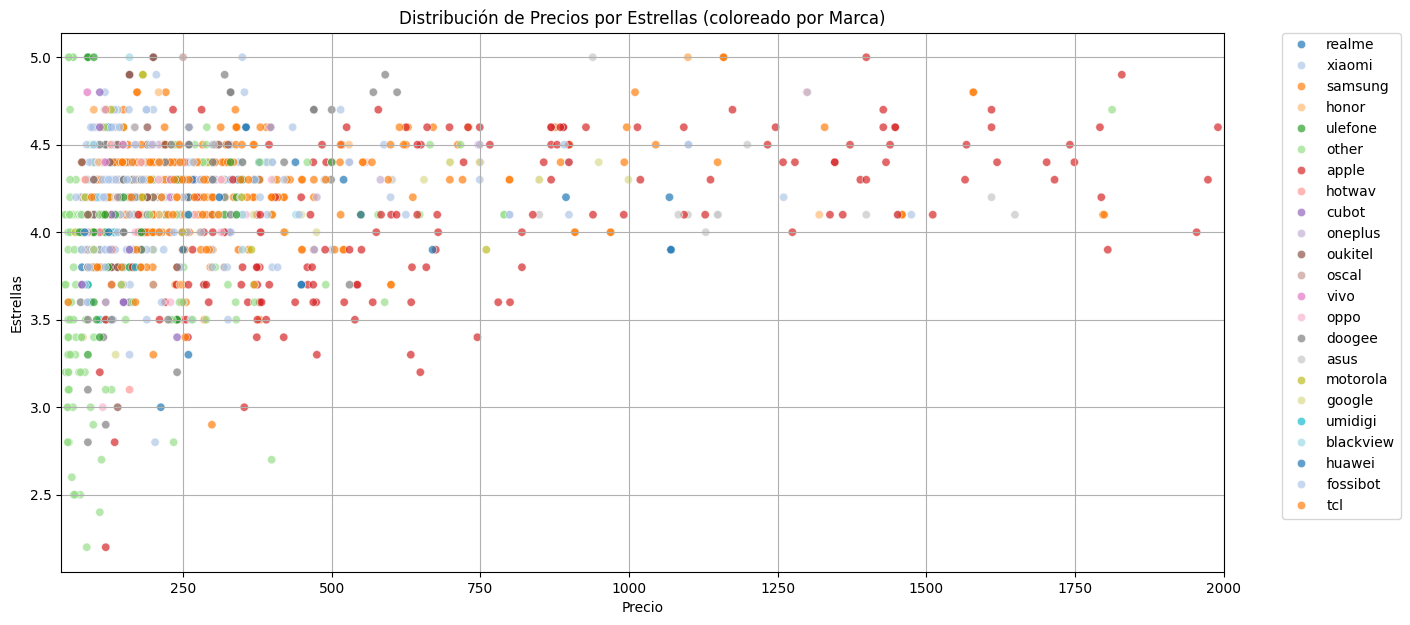

In [1086]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

marca_counts = db['Marca'].value_counts()
db['Marca_filtrada'] = db['Marca'].apply(lambda x: x if x in marca_counts[marca_counts > 10].index else 'other')

plt.figure(figsize=(15, 7))
sns.scatterplot(data=db, x='Precio', y='Estrellas', hue='Marca_filtrada', alpha=0.7, palette='tab20')
plt.xlabel('Precio')
plt.ylabel('Estrellas')
plt.title('Distribución de Precios por Estrellas (coloreado por Marca)')
plt.xlim(45, 2000)
plt.grid()
# plt.yticks([1, 2, 3, 4, 5])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [1087]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# marca_counts = db['Marca'].value_counts()
# db['Marca_filtrada'] = db['Marca'].apply(lambda x: x if x in marca_counts[marca_counts > 10].index else 'other')

# plt.figure(figsize=(15, 7))
# sns.barplot(data=db, x='Memoria', y='RAM', hue='Marca_filtrada', alpha=0.7, palette='tab20')

# plt.xlabel('Memoria')
# plt.ylabel('RAM')
# plt.title('Distribución de Memoria por RAM (coloreado por Marca)')
# plt.yscale('log')
# plt.yticks([1, 2, 4, 6, 8, 12, 16, 32, 64], labels=[1, 2, 4, 6, 8, 12, 16, 32, 64])
# plt.grid()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.show()